## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [4]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "ï": "i",
    "£": "$",
    "à":"a",
    "è": "e",
    "ì": "i",
    "ò": "o",
    "ù": "u",
    "®": "",
    "ä": "a",
    "ë": "é",
    "ï": "i",
    "ö": "o",
    "ü": "u",
    "Bouvetøya":"Bouvet",
    " \' ":"'",
    "\'":"'",
    "¹":"'",
    "â":"a",
    "ê":"e",
    "î":"i",
    "ô":"o",
    "û":"u",
    "å": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u",
    "á": "a",
    "é": "e",
    "í": "i",
    "ó": "o",
    "ú": "u"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [5]:
# comentado 2 ### comentado


# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "bullard\'s": "bullards",
    "world\'s":"worlds",
    "avery\'s":"averys",
    "wallet\'s":"wallets",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "brother\'s": "brothers",
    "sister\'s": "sisters",
    "haakon\'s": "haakons",
    "king\'s": "kings",
    "queen\'s": "queens",
    "family\'s": "families",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "it\'s": "its",
    "won\'t":"wont",
    "weyland\'s": "weylands",
    "didn\'t": "didnt"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Función para limpiar el texto
def clean_text(text):
    # Convertir en minúsculas
    text = text.lower()
    return text

# Aplicar la función de limpieza a la columna de trama de tus DataFrames
dataTraining['plot'] = dataTraining['plot'].apply(clean_text)


In [9]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [10]:
import pandas as pd
import re

def corregir_espacios_s(texto):
    # Patrón para identificar " palabra s "
    patron = r"\b(\w+)\s+s\b"
    # Reemplazar con "palabra's"
    texto_corregido = re.sub(patron, r"\1's", texto)
    return texto_corregido

# Aplicar la función a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(corregir_espacios_s)

In [13]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "u. s.": "u.s.",
    "dr. t. ": "dr.",
    "!!": "!",
    "_": " "
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [14]:
import spacy

In [15]:
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_lg')

def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)

# Aplicar la función a la columna "plot" con una barra de progreso
tqdm.pandas()
dataTraining['plot'] = dataTraining['plot'].progress_apply(lematizar_texto)


100%|██████████| 7895/7895 [03:47<00:00, 34.72it/s]


In [18]:
import spacy
# Cargar el modelo del idioma inglés
nlp = spacy.load('en_core_web_lg')

def remove_stopwords_spacy(text):
    # Procesar el texto con spaCy
    doc = nlp(text)
    # Eliminar stopwords y unir las palabras restantes
    filtered_text = ' '.join([token.text for token in doc if not token.is_stop])
    return filtered_text

# Aplicar la función de eliminación de stopwords a la columna 'plot'
dataTraining['plot'] = dataTraining['plot'].apply(remove_stopwords_spacy)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [20]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,story single father year - old son work railro...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,serial killer decide teach secret satisfying c...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"sweden , female blackmailer disfiguring fac...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"friday afternoon new york , president tredw...",['Drama'],7.4
2582,1990,Narrow Margin,"los angeles , editor publishing house carol...","['Action', 'Crime', 'Thriller']",6.6


Epoch 1/500
158/158 - 6s - loss: 0.7996 - accuracy: 0.0135 - val_loss: 0.7008 - val_accuracy: 0.0000e+00 - lr: 0.0100 - 6s/epoch - 41ms/step
Epoch 2/500
158/158 - 1s - loss: 0.6362 - accuracy: 0.0289 - val_loss: 0.5977 - val_accuracy: 0.0000e+00 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 3/500
158/158 - 1s - loss: 0.6034 - accuracy: 0.0400 - val_loss: 0.5852 - val_accuracy: 0.0000e+00 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 4/500
158/158 - 1s - loss: 0.5918 - accuracy: 0.0445 - val_loss: 0.5752 - val_accuracy: 0.0016 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 5/500
158/158 - 1s - loss: 0.5816 - accuracy: 0.0479 - val_loss: 0.5665 - val_accuracy: 0.0024 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 6/500
158/158 - 1s - loss: 0.5724 - accuracy: 0.0455 - val_loss: 0.5584 - val_accuracy: 0.0024 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 7/500
158/158 - 1s - loss: 0.5640 - accuracy: 0.0443 - val_loss: 0.5510 - val_accuracy: 0.0024 - lr: 0.0100 - 1s/epoch - 7ms/step
Epoch 8/500
158/158 - 1s - loss: 0.

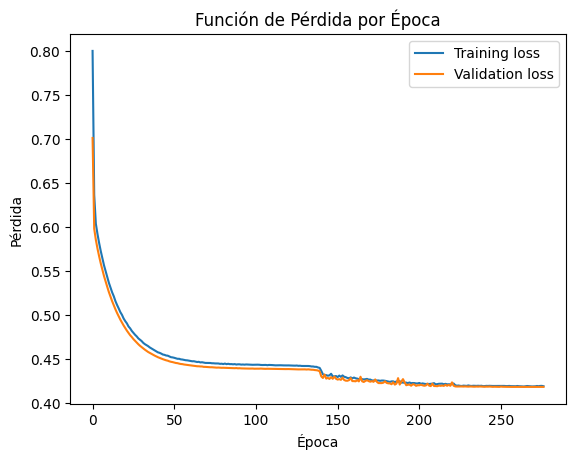

In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.regularizers import l2

# Parámetros de tokenización y secuencias
vocab_size = 1000  # Tamaño del vocabulario
max_length = 100    # Longitud máxima de las secuencias
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Preparar datos para Word2Vec (lista de listas de palabras)
texts = [text.split() for text in dataTraining['plot']]
word2vec_model = Word2Vec(sentences=texts, vector_size=250, window=5, min_count=1, workers=4)

# Obtener el embedding para cada palabra en nuestro vocabulario
embedding_matrix = np.zeros((vocab_size, 250))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass

# Inicializar el MultiLabelBinarizer y ajustar y transformar los géneros
mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(dataTraining['genres'])
outputClasses = y_genres.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_genres, y_test_genres = train_test_split(padded_sequences, y_genres, test_size=0.20, random_state=42)

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

from keras.optimizers import SGD

# Instanciar el optimizador SGD con momentum
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Construir el modelo con una capa GRU
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=250, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(GRU(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(outputClasses, activation='sigmoid'))
# Compilar el modelo utilizando el optimizador SGD
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje cuando la métrica de rendimiento deja de mejorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)

# Incluye el callback en el método fit
history = model.fit(
    X_train,
    y_train_genres,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=2,  # Cambio: ajuste en el nivel de verbosidad para más detalle por época
    callbacks=[early_stopping, reduce_lr]
)

# Realizar predicciones en el conjunto de prueba con el modelo
y_pred_genres_prob = model.predict(X_test)

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score: {auc_score}")

# Visualizar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Función de Pérdida por Época')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

In [24]:
# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score: {auc_score}")

#0.880472811795811

#0.8825984157812565 lematizado
#0.8813786097677743 Lematizado - Stopwords

ROC AUC Score: 0.881725014009522


Epoch 1/500
84/84 - 5s - loss: 0.6175 - accuracy: 0.1356 - val_loss: 0.4763 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04 - 5s/epoch - 54ms/step
Epoch 2/500
84/84 - 1s - loss: 0.4669 - accuracy: 0.0000e+00 - val_loss: 0.4662 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04 - 863ms/epoch - 10ms/step
Epoch 3/500
84/84 - 1s - loss: 0.4636 - accuracy: 0.0000e+00 - val_loss: 0.4643 - val_accuracy: 0.0000e+00 - lr: 1.0000e-04 - 865ms/epoch - 10ms/step
Epoch 4/500
84/84 - 1s - loss: 0.4618 - accuracy: 0.0013 - val_loss: 0.4616 - val_accuracy: 0.0022 - lr: 1.0000e-04 - 818ms/epoch - 10ms/step
Epoch 5/500
84/84 - 1s - loss: 0.4598 - accuracy: 0.0257 - val_loss: 0.4595 - val_accuracy: 0.1155 - lr: 1.0000e-04 - 808ms/epoch - 10ms/step
Epoch 6/500
84/84 - 1s - loss: 0.4572 - accuracy: 0.1429 - val_loss: 0.4564 - val_accuracy: 0.1080 - lr: 1.0000e-04 - 801ms/epoch - 10ms/step
Epoch 7/500
84/84 - 1s - loss: 0.4532 - accuracy: 0.1365 - val_loss: 0.4515 - val_accuracy: 0.1230 - lr: 1.0000e-04 - 812ms/epoch -

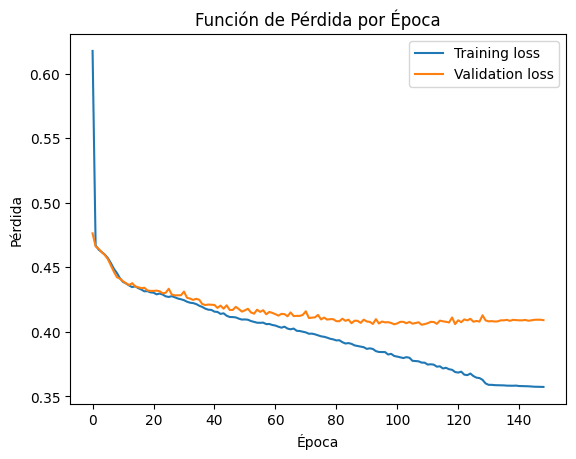

In [74]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.regularizers import l2
from tensorflow.keras.layers import PReLU


# Parámetros de tokenización y secuencias
vocab_size = 2500  # Tamaño del vocabulario
max_length = 100    # Longitud máxima de las secuencias
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(dataTraining['plot'])
sequences = tokenizer.texts_to_sequences(dataTraining['plot'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Preparar datos para Word2Vec (lista de listas de palabras)
texts = [text.split() for text in dataTraining['plot']]
word2vec_model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)

# Obtener el embedding para cada palabra en nuestro vocabulario
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        try:
            embedding_vector = word2vec_model.wv[word]
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass

# Inicializar el MultiLabelBinarizer y ajustar y transformar los géneros
mlb = MultiLabelBinarizer()
y_genres = mlb.fit_transform(dataTraining['genres'])
outputClasses = y_genres.shape[1]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_genres, y_test_genres = train_test_split(padded_sequences, y_genres, test_size=0.15, random_state=52)

# Definir el callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,
    verbose=1,
    restore_best_weights=True
)

# Construir el modelo con una capa GRU
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length, weights=[embedding_matrix], trainable=False))
model.add(GRU(256, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='PReLU',kernel_regularizer=l2(0.0001)))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='selu'))
model.add(Dense(outputClasses, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje cuando la métrica de rendimiento deja de mejorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_lr=0.000001, verbose=1)

# Incluye el callback en el método fit
history = model.fit(
    X_train,
    y_train_genres,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)

# Realizar predicciones en el conjunto de prueba con el modelo
y_pred_genres_prob = model.predict(X_test)

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score: {auc_score}")

# Visualizar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Función de Pérdida por Época')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.show()

In [75]:
# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres_prob, average='micro')
print(f"ROC AUC Score: {auc_score}")

#0.8814097999126813

#0.8850510393238983 lematizado
#0.8892334701065324 Lematizado - Stopwords

ROC AUC Score: 0.9001931156207246
